## The Diffusion Equation

The Diffusion Equation is a partial differential equation which describes changes in concetration of a substance that diffusing in a spatial system. When the diffusion coefficient `D` of the substance `u` is constant throughout  the system, the diffusion equation takes the form. 

$$
\begin{equation} 
\frac{\partial u}{\partial t} = D \frac{ \partial^2 u}{\partial x^2} \tag{1}
\end{equation}
$$

This equation is also called the Heat Equation, since it also describes the distribution of a heat in a given region over time. It is also Fick’s second law. To solve these type of equations, we need to now the initial conditions, as well as the boundary condition, i.e., the value of `u` at the two edges of the system: `u(0)` and `u(L)`. Lets assume that the value of `u` is constant in one of the edges with a value `u_0`. This is equivalent to assume that our substance `u` is being produced at one side of the system. Let's also assume that at the other edge, `u` dissapears or is being consumed, so `u(L)=0`. Therefore, our boundary conditions are $u(0,t)=u_0$ and $u(L,t)=0$.

If we want to find the steady state solution we obtain:

$$
\begin{equation} 
\frac{\partial u}{\partial t} = D \frac{ \partial^2 u}{\partial x^2} =0 \tag{2}
\end{equation}
$$

In this condition, Fick’s second law is reduced to Laplace’s equation, $\nabla^2 u= 0$. It follows that $u=$C_1$ x +  C_2$, where  $C_1$ and $C_2$ are intergration constants that we can find using the boundary conditions. 
$$
C_2=u(0)
C_1=\frac{u(L) − u(0)}{L}=-\frac{u(0)}{L} \tag{3}
$$

so the solution of the gradient is simply a straight line when the system is stable, such as:

$$
u_{ss}(x)=  - \frac{u(0)}{L} x + u(0)=u(0)(1-\frac{x}{L}) \tag{4}
$$




In [1]:
using Plots
gr()

Plots.GRBackend()

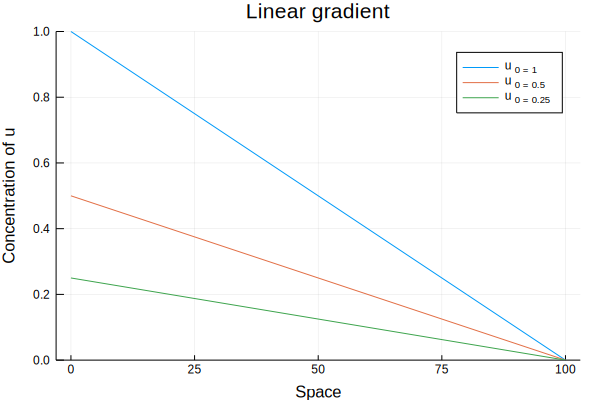

In [2]:
x=collect(0:0.1:100)
u₀=1
L=100
plot(x,x->u₀*(1-(x/L)),label="\\ u_0 = 1",seriestype=:line,ylims = (0,1))
u₀=0.5
L=100
plot!(x,x->u₀*(1-(x/L)),label="\\ u_0 = 0.5",seriestype=:line,ylims = (0,1))
u₀=0.25
L=100
plot!(x,x->u₀*(1-(x/L)),label="\\ u_0 = 0.25",seriestype=:line,ylims = (0,1))
title!("Linear gradient")
ylabel!("Concentration of u")
xlabel!("Space")

# Reaction-Diffusion

Quite often in biology, these diffusiong substances or morphogenes interact with other substances or receptor molecules, or are being internalized by cells, or simply degraded constantly in teh systems. To study this type of systems we use a class of partial differential equations (PDE's) called Reaction-Diffusion Equations. These type of equations are used to describe the diffusion (spreading out) and reaction of one or several chemical species.

In the simplest one-dimensional case and one singel substance, let `u(x,t)` be the concentration of `u` at location `x` at time `t`. Then, the reaction-diffusion equation has the form:

$$
\begin{equation} \frac{\partial u}{\partial t} = \underbrace{D_u \frac{\partial^2 u} 
{\partial x^2}}_{\text{Diffusion}} + \overbrace{f(u)}^{\text{Reaction}}  \tag{5} 
\end{equation}
$$

where `D`  is a coefficient associated with the diffusive properties of `u`, and `f(u)` is a function that describes how `u` grows or decays depending on its current state.

Lets for now consider the simplest reaction where `u` is simply being consumed in the extended system with a constant rate. This is a very common scenario for morfogens, that are consumed by the cells as they process the information:

$$   
u \overset{k}{\longrightarrow} 0 \tag{6}
$$ 

so, the reaction term is $f(u) = - k \cdot u$. In this case, in a adimensional system, (no diffussion), the system is described by a single first order differential equation. 

 $$\frac{\mathrm{d} u}{\mathrm{d} t} =  - k \cdot u \tag{7}$$ 
 
 with a solution
 
 $$ u (t)= u (0) \cdot e^{- k t}  \tag{8}$$
 
When we combine both diffusion and degradation we have the following equation: 

$$
\begin{equation} 
\frac{\partial u(x,t)}{\partial t} = D \frac{ \partial^2u(x,t)}{\partial x^2} - k \cdot u(x,t) \tag{9}
\end{equation}
$$


if we look for the steady state solution 
$$
\begin{equation} 
\frac{ \partial^2u(x,t)}{\partial x^2} = \frac{k}{D} u(x,t) \tag{10}
\end{equation}
$$
where, the second derivative of `u` with respect to `x` is proportional to itself. The only functions for `u` with this property are exponential functions. Therefore, one can propose a general solution for `u` :

$$
u=  C_1 \cdot e^{-x/\lambda} + C_2 e^{+x/\lambda} \tag{11}
$$

if we test if the previous equation is a solution, the first derivative:
$$
\frac{ \partial u(x,t)}{\partial x}=-\frac{C_1}{\lambda} \cdot e^{-x/\lambda} + \frac{C_2}{\lambda} e^{+x/\lambda} \tag{12}
$$
and the second derivative

$$
\frac{ \partial^2 u(x,t)}{\partial^2 x}=\frac{C_1}{\lambda^2} \cdot e^{-x/\lambda} + \frac{C_2}{\lambda^2} e^{+x/\lambda} \tag{13}
$$

rearranging terms 
$$
\frac{ \partial^2 u(x,t)}{\partial^2 x}=\frac{1}{\lambda^2}(C_1 \cdot e^{-x/\lambda} + C_2 e^{+x/\lambda})=\frac{u}{\lambda^2} \tag{4}
$$

using the Eq 10. we arrive at the condition for the solution

$$
\frac{u(x,t)}{\lambda^2}=\frac{k}{D} u(x,t) \tag{15}
$$
so
$$
\lambda = \sqrt{\frac{D}{k}} \tag{16}
$$

To determine the constants $C_1$ and $C_2$, we need two equations. We use the two boundary conditions used for the case of only diffusion. 

$$
u(0,t)_{ss}=  C_1 \cdot e^{-0/\lambda} + C_2 e^{+0/\lambda}= C_1 + C_2 = u_0 \tag{17}
$$

$$
u(L,t)_{ss}=  C_1 \cdot e^{-L/\lambda} + C_2 e^{+L/\lambda}= 0 \tag{18}
$$
for the case that the dimensions are much larger than the caracteristic length of the exponential, the second term of the equation goes to infinite, so $C_2$ has to be zero. Therefore $ C_1=u_0 $ and tegh soultion of the stable gradient is a single exponential:

$$
\begin{equation}  u(x,t)_{ss} = u_0 e^{-x\sqrt{\frac{k}{D}}} \tag{19}
 \end{equation}
$$










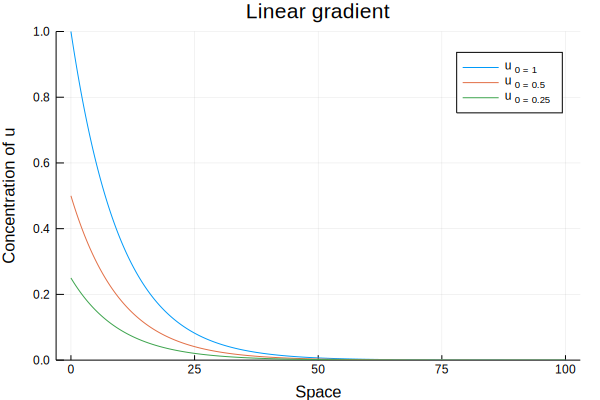

In [3]:
u₀=1
k=0.1
D=10
L=100
plot(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ u_0 = 1",seriestype=:line,ylims = (0,1))
title!("Linear gradient")
xlabel!("Space")
ylabel!("Concentration of u")

u₀=0.5
plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ u_0 = 0.5",seriestype=:line,ylims = (0,1))
u₀=0.25
plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ u_0 = 0.25",seriestype=:line,ylims = (0,1))



## Numerical simulations of reaction-diffusion

More complex combinations of reaction and diffusion have to be solved numerically. This is done using a simultaneous discretization of space and time.  Tod do that, we have to discretize time and space. We will use the simples approach of using an euler discretization method.

In [196]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps);

In [197]:
## temporal scaling
number_of_iterations=1000;
total_time=70;
time_step=total_time/number_of_iterations;

In [198]:
## Parameters and initial conditions
D=10; # ?m^2/min 
u=zeros(1,number_of_steps)
u[1]=1;
u_=u; 

In [201]:
plt=plot(x,u');

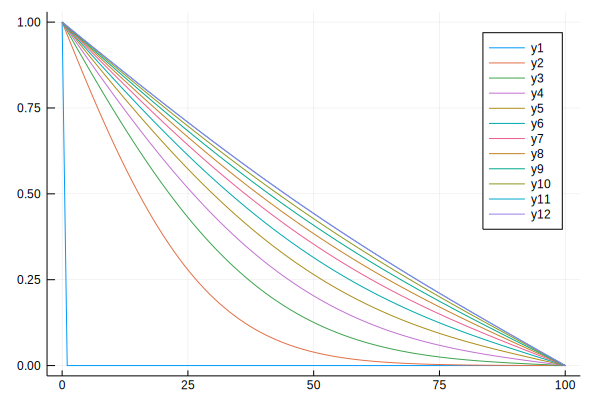

In [202]:
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step * D * (u_[i-1]-2*u_[i]+u_[i+1])/(space_step*space_step);  
    end
    
    
    
    u[1]=1; # fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    #u[1]=u[2]; # zero flux boundary conditions
    #u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;
    if   ii% 100 == 0
        plot!(x,u')
        
        
    end
end
#display(plt)
plot!(x,u')

We see that the system steady state is a straigth line, as predicted by the theory

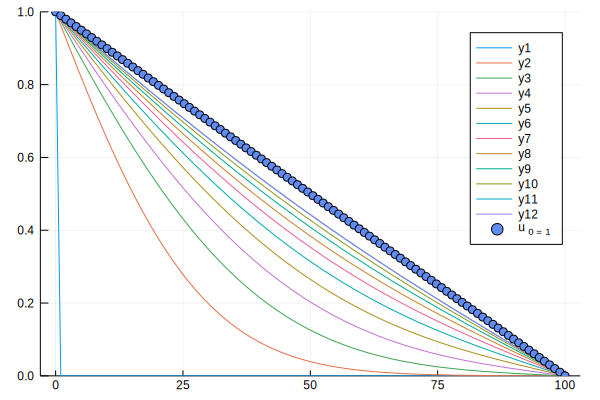

In [203]:
u₀=1
L=100
plot!(x,x->u₀*(1-(x/L)),label="Theory",seriestype=:scatter,ylims = (0,1))

If we now introduce a constant consumption of the morphogen across the system we have the exponential gradient predicted by the theory

In [189]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=1000;
total_time=70;
time_step=total_time/number_of_iterations;

## Parameters and initial conditions
D=10; # ?m^2/min 
u=zeros(1,number_of_steps)
u[1]=1;
u_=u; 

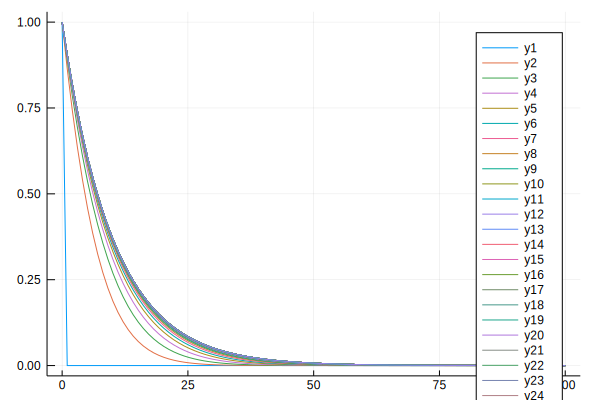

In [190]:
plt=plot(x,u');
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(-k*u_[i]+ D * (u_[i-1]-2*u_[i]+u_[i+1])/(space_step*space_step));  
    end
    
    u[1]=1; # fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    #u[1]=u[2]; # zero flux boundary conditions
    #u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;
    if   ii% 10 == 0
        plot!(x,u')
        
        
    end
end
#display(plt)
plot!(x,u')

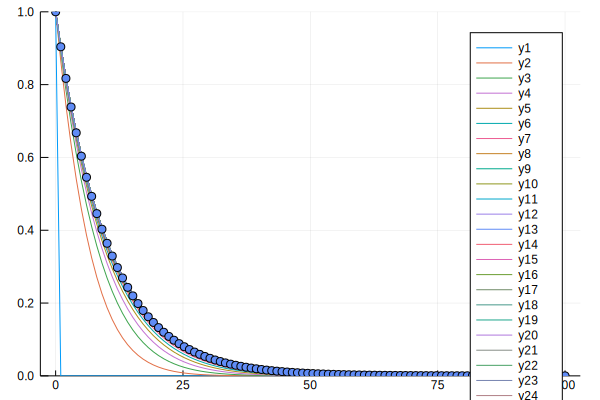

In [191]:
u₀=1
k=0.1
D=10
L=100
plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="Theory",seriestype=:scatter,ylims = (0,1))

This code can be arbitratialy complicated when the system has more than one variable and complex interactions. When interactions are nonlinear, intersting things can happen, such as Turing patterns or spiral waves. 